In [2]:
# import dealed data
# !pip install pandas
# !pip install matplotlib

import pandas as pd

%time df_dealed_data = pd.read_pickle('muggles_dealed_data.pickle')

CPU times: user 2.96 ms, sys: 1.18 ms, total: 4.14 ms
Wall time: 4.52 ms


In [3]:
df_dealed_data.head();

In [4]:
from SelfModules import Module_VarsCorr as VarsCorr

In [5]:
# prepare variables

y_v = "Views"
y_l = 'Likes'
y_c = 'Comments'
y_l_v = 'Likes/Views(%)'
y_c_l = 'Comments/Likes(%)'
y_c_v = 'Comments/Views(%)'
y_t = 'Time Duration'
x_label = "Percentile of Video(%)"

value_video_data = df_dealed_data[['Views', 'Likes', 'Comments', \
                    'Likes/Views(%)', 'Comments/Likes(%)', 'Comments/Views(%)', \
                    'Time Duration']]

## (Linear) Relationship on absolute values

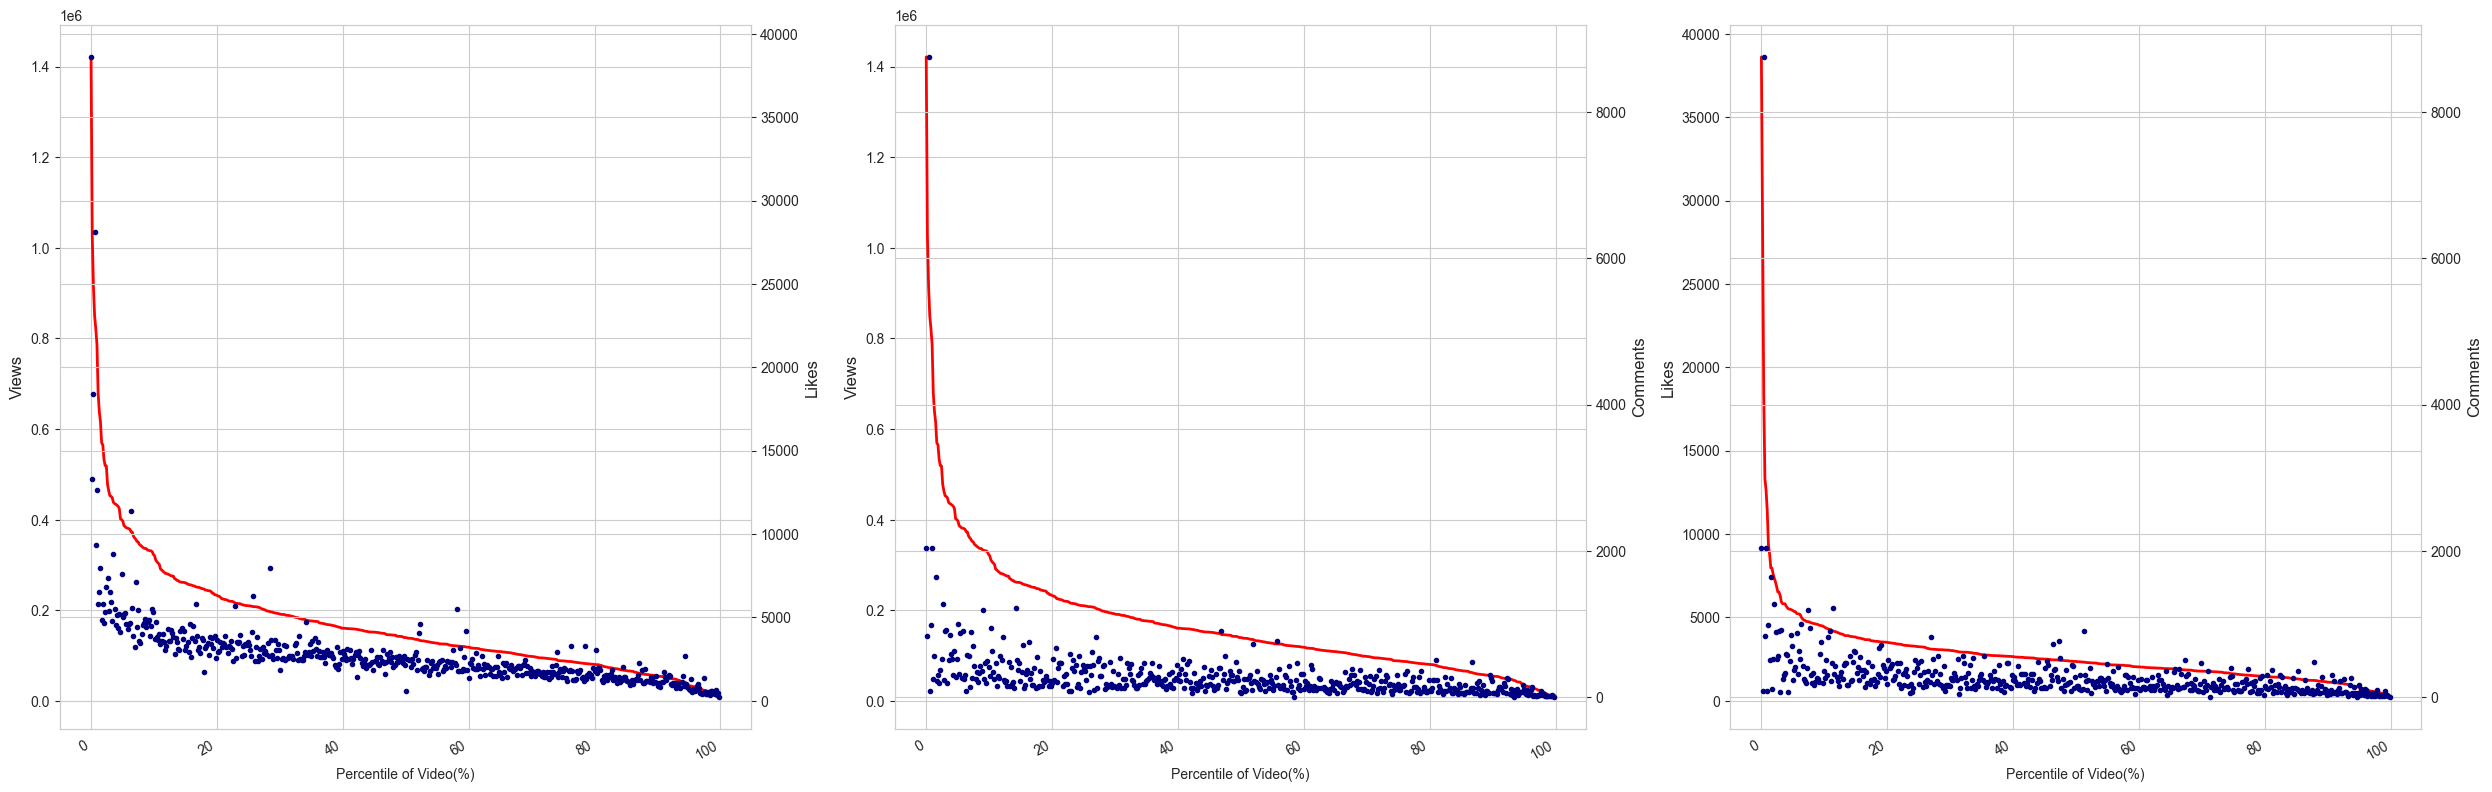

In [6]:
# compare on absolute values


VarsCorr.draw_multi(num_fig=3, l=25, w=8, \
           list_y1=[y_v, y_v, y_l], \
           list_y2=[y_l, y_c, y_c], \
           list_xlabels=[x_label, x_label, x_label], \
           list_ht=[False, False, False], list_per=[0.025, 0.025, 0.025], df=value_video_data, sparce=1)

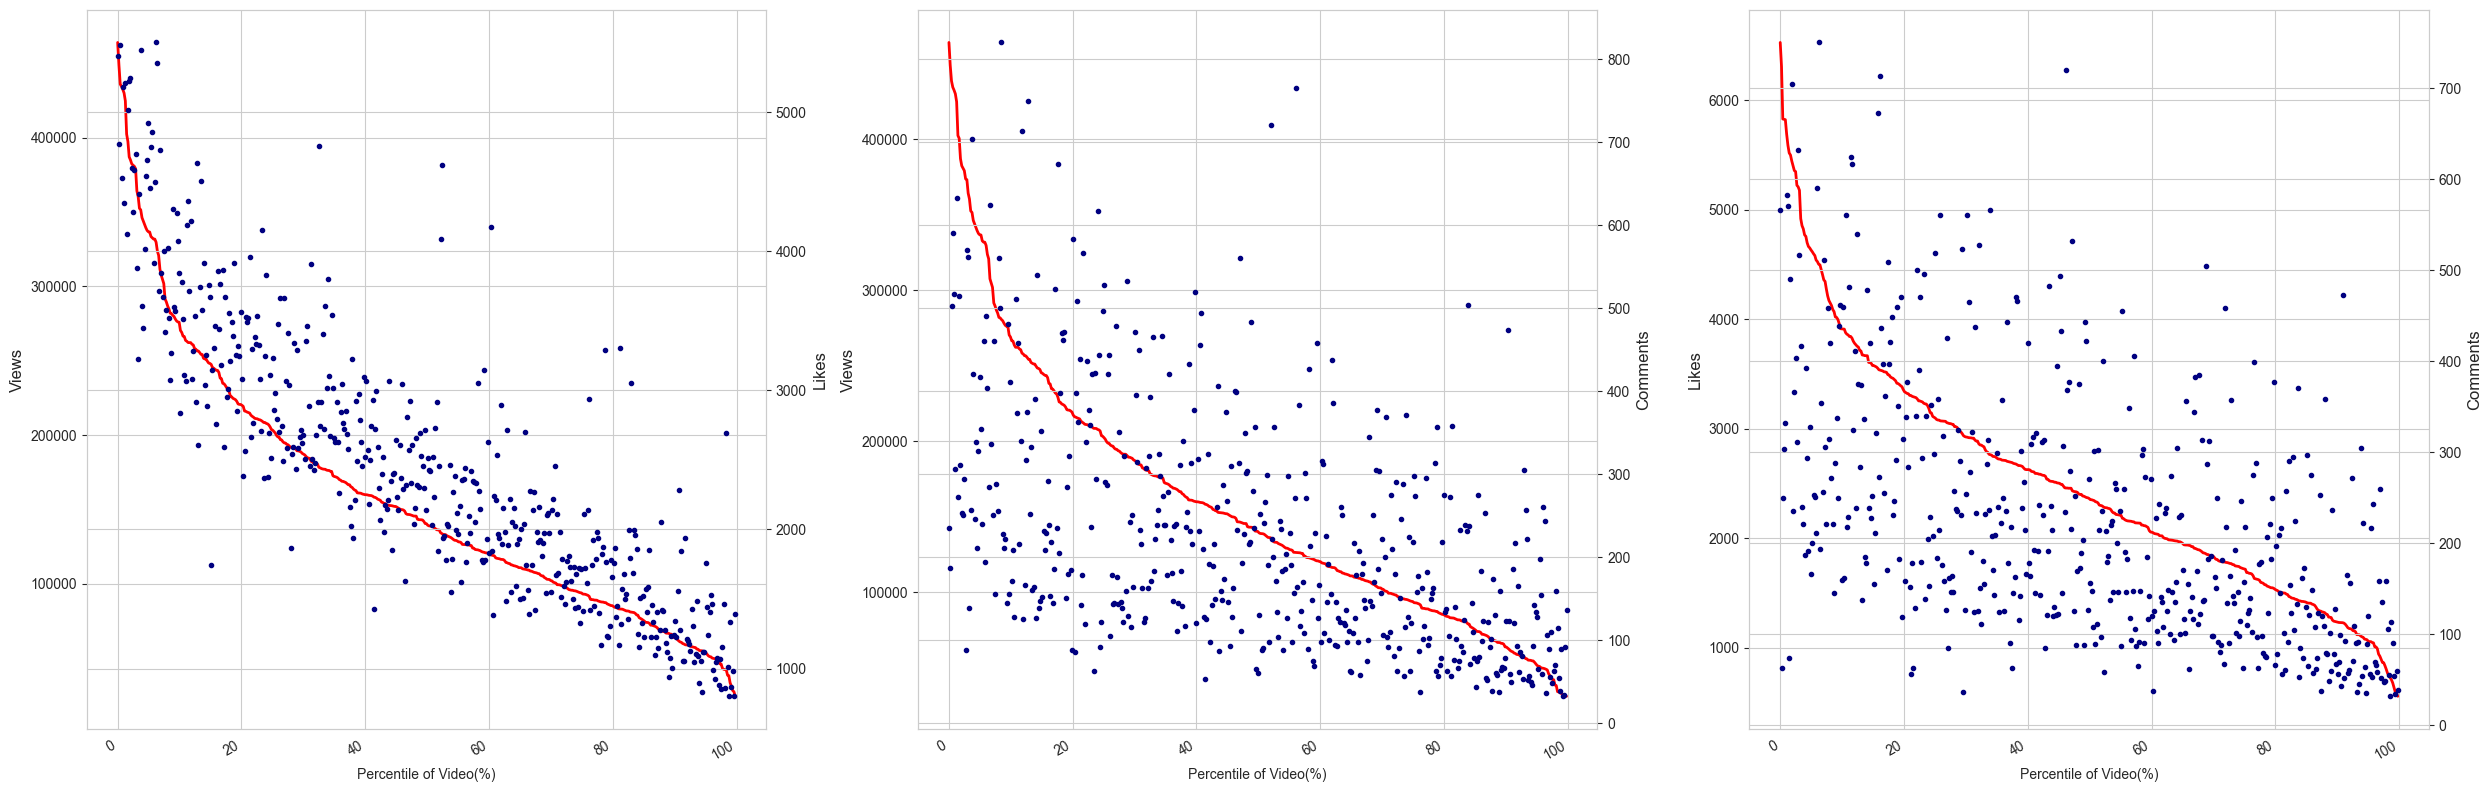

In [7]:
# compare on absolute values
VarsCorr.draw_multi(num_fig=3, l=25, w=8, \
           list_y1=[y_v, y_v, y_l], \
           list_y2=[y_l, y_c, y_c], \
           list_xlabels=[x_label, x_label, x_label], \
           list_ht=[True, True, True], list_per=[0.025, 0.025, 0.025],
           df=value_video_data, sparce=1)


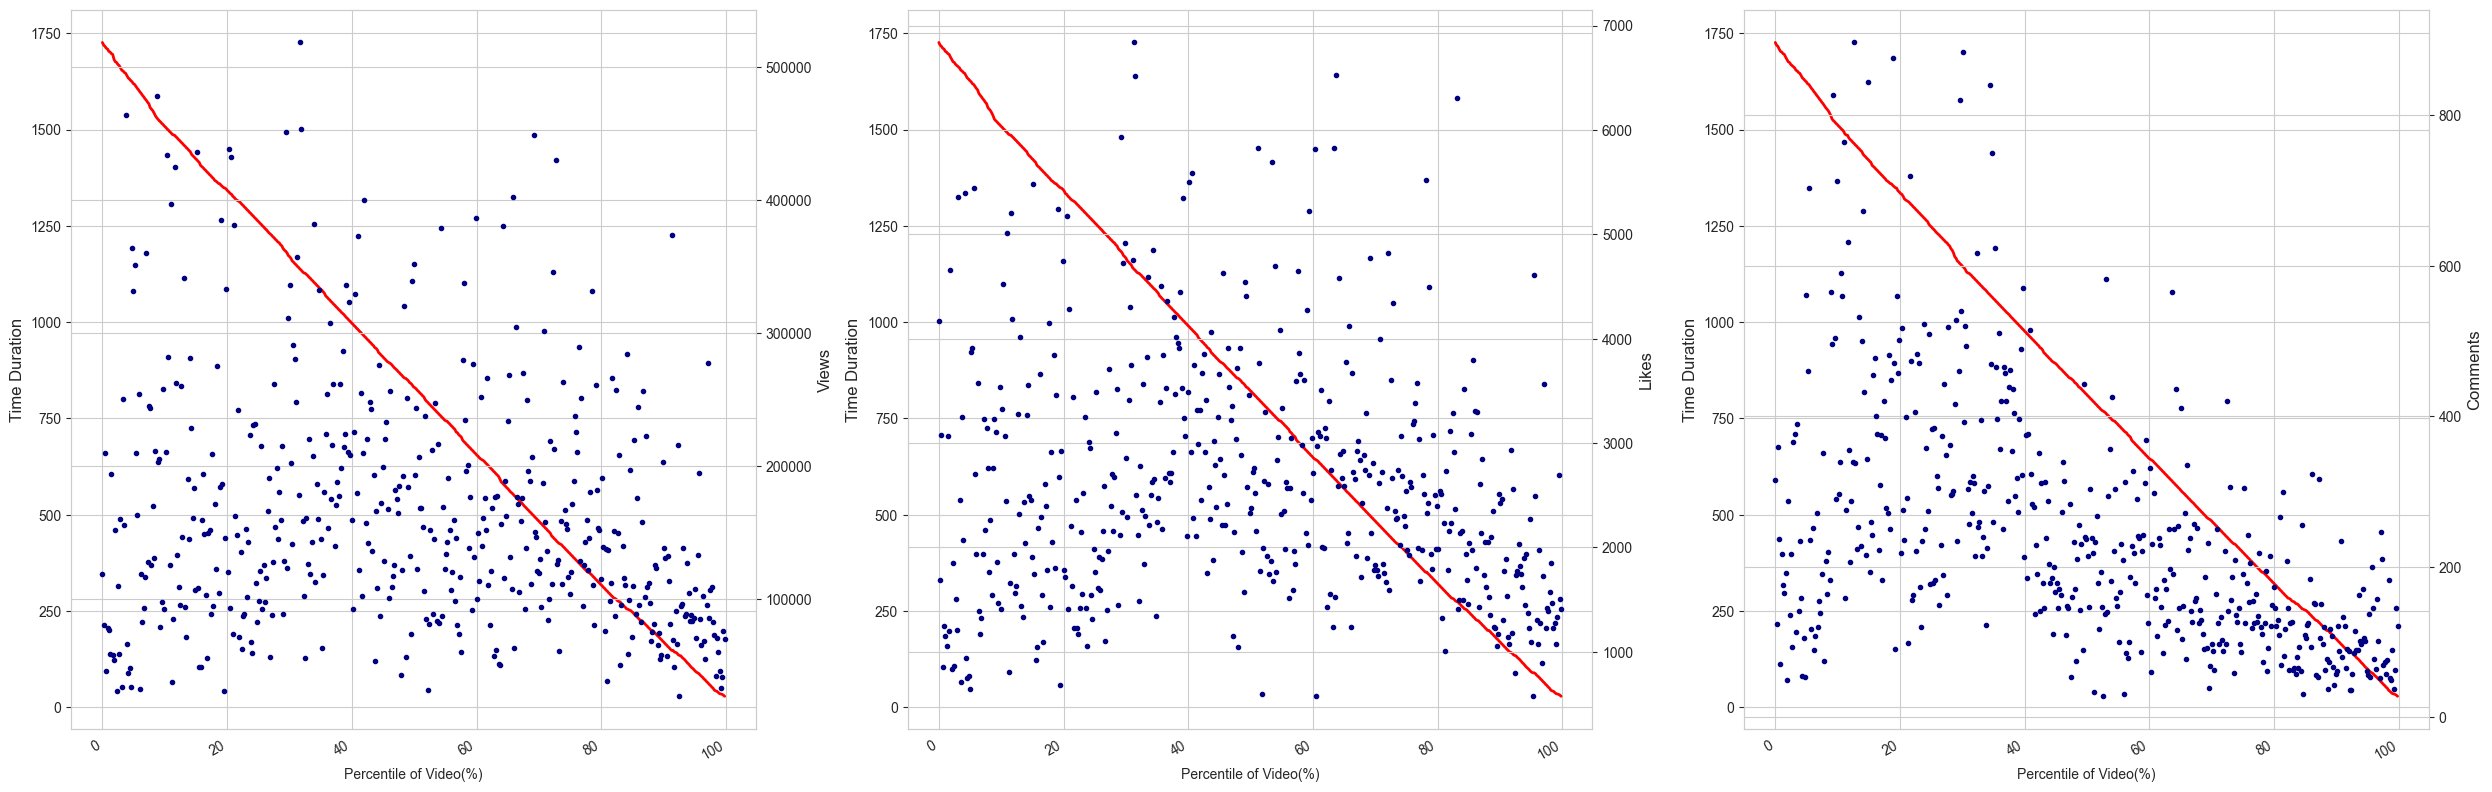

In [8]:
# find relationship based on time; absolute value

VarsCorr.draw_multi(num_fig=3, l=25, w=8, \
           list_y1=[y_t, y_t, y_t], \
           list_y2=[y_v, y_l, y_c], \
           list_xlabels=[x_label, x_label, x_label], \
           list_ht=[True, True, True], list_per=[0.025, 0.025, 0.025],
           df=value_video_data, sparce=1)

## (Linear) relationship on Ratios

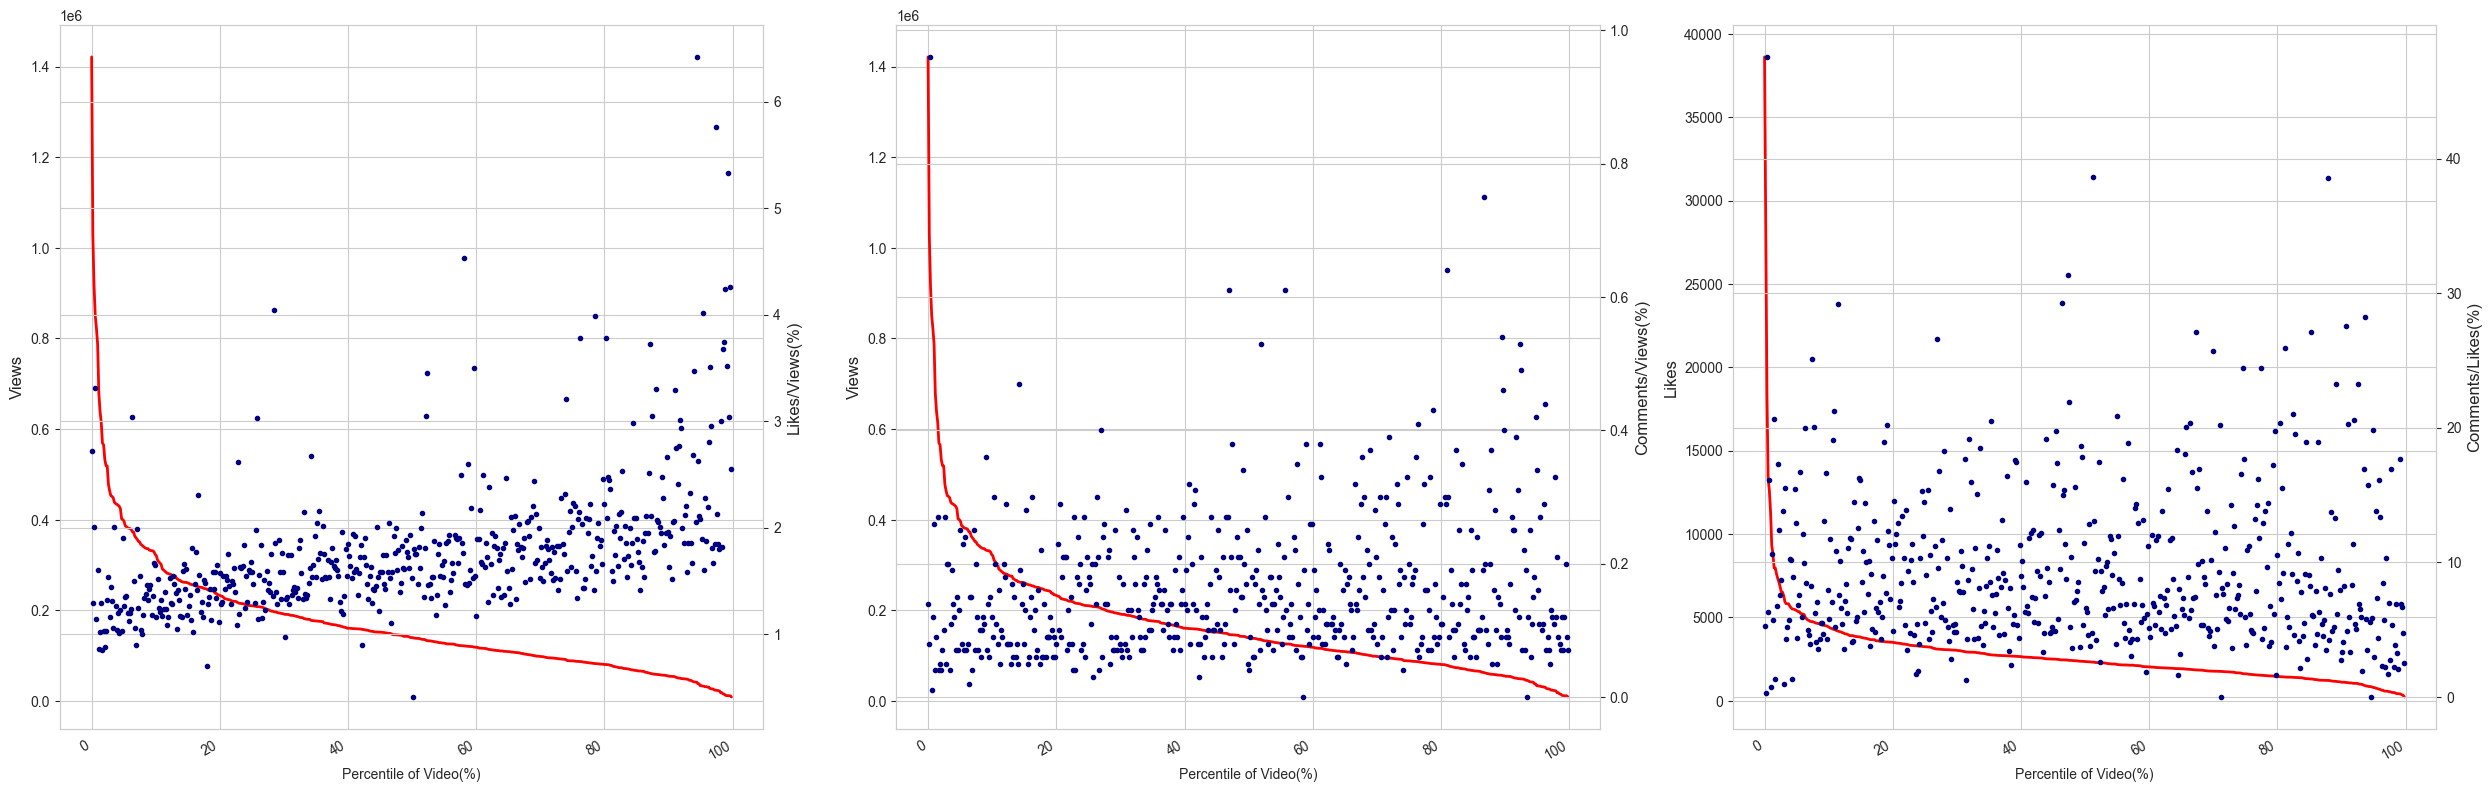

In [9]:
# compare on ratios

VarsCorr.draw_multi(num_fig=3, l=25, w=8, \
           list_y1=[y_v, y_v, y_l], \
           list_y2=[y_l_v, y_c_v, y_c_l], \
           list_xlabels=[x_label, x_label, x_label], \
           list_ht=[False, False, False], list_per=[0.025, 0.025, 0.025],
           df=value_video_data, sparce=1)

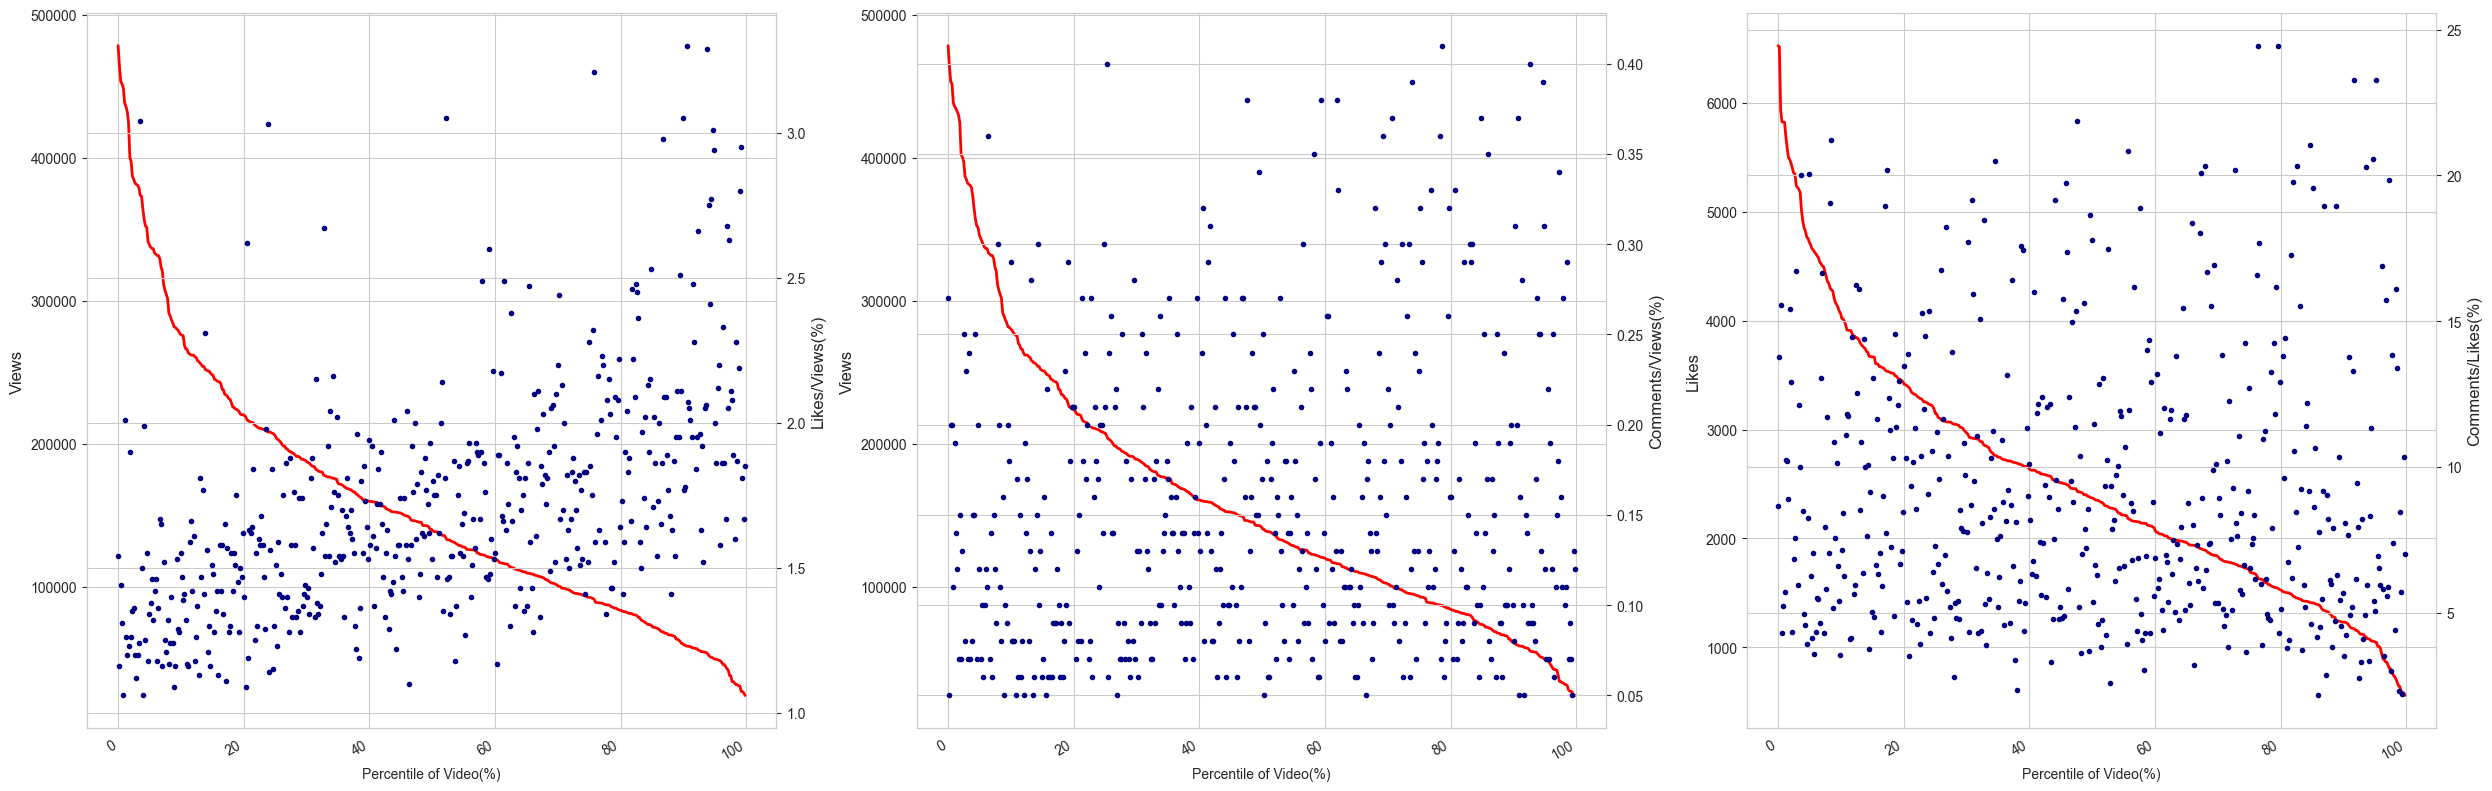

In [10]:
# compare on ratios

VarsCorr.draw_multi(num_fig=3, l=25, w=8, \
           list_y1=[y_v, y_v, y_l], \
           list_y2=[y_l_v, y_c_v, y_c_l], \
           list_xlabels=[x_label, x_label, x_label], \
           list_ht=[True, True, True], list_per=[0.025, 0.025, 0.025],
           df=value_video_data, sparce=1)

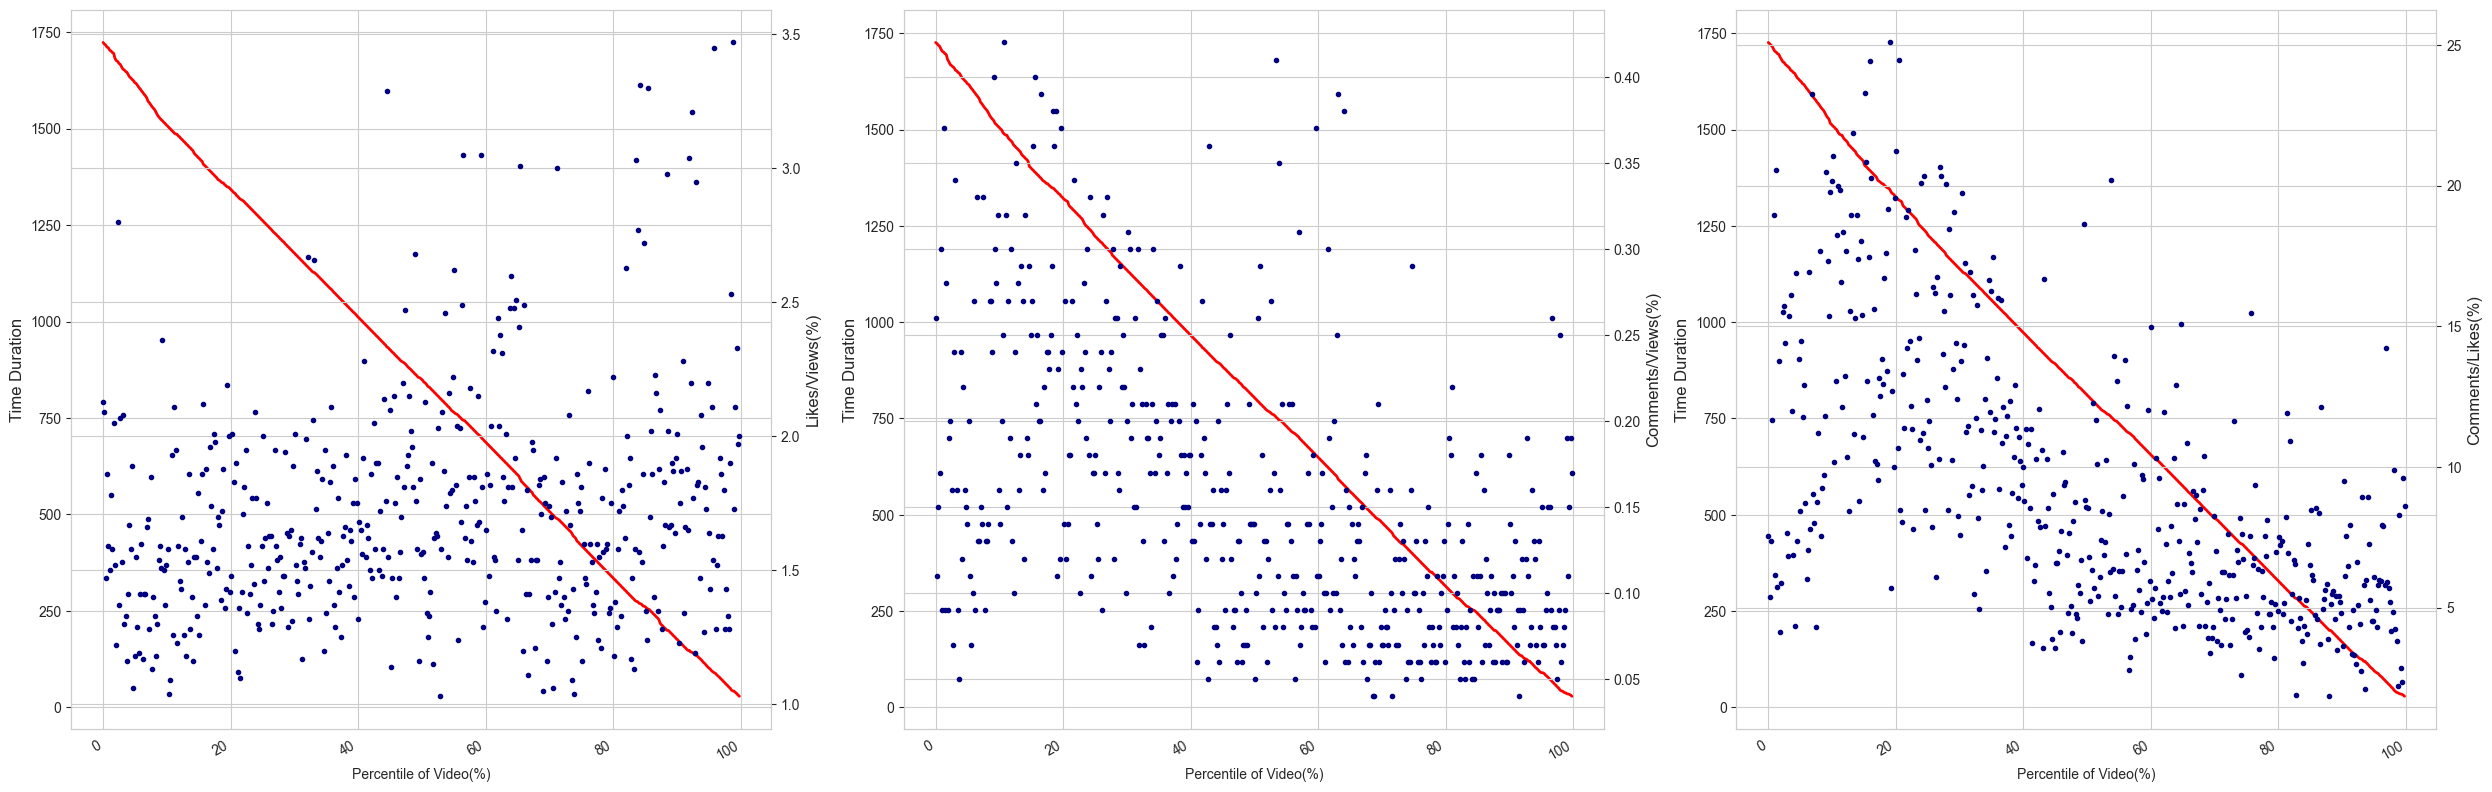

In [11]:
# find relationship based on time 

VarsCorr.draw_multi(num_fig=3, l=25, w=8, \
           list_y1=[y_t, y_t, y_t], \
           list_y2=[y_l_v, y_c_v, y_c_l], \
           list_xlabels=[x_label, x_label, x_label], \
           list_ht=[True, True, True], list_per=[0.025, 0.025, 0.025],
           df=value_video_data, sparce=1)

## Correlation

<Axes: >

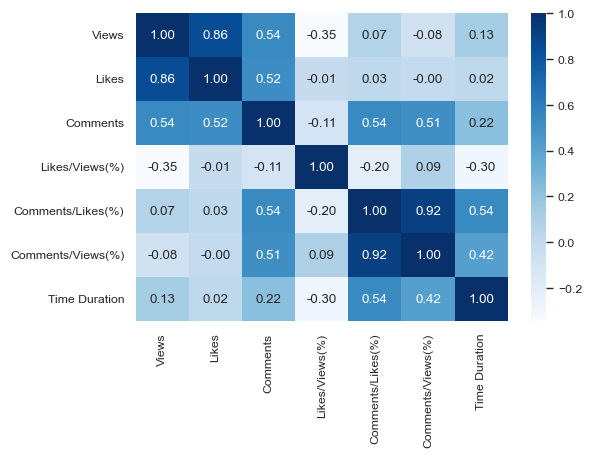

In [12]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

value_video_data = df_dealed_data[['Views', 'Likes', 'Comments', 'Likes/Views(%)', 'Comments/Likes(%)', 'Comments/Views(%)', 'Time Duration']]

plt.figure(figsize=(6,4))
sns.set_context('paper', font_scale=1)

# value_video_data.head();
crash_mx = value_video_data.corr()
crash_mx;

sns.heatmap(crash_mx, annot=True, cmap='Blues',fmt=".2f")
# sns.heatmap(crash_mx, annot=True, fmt=".1f")

535


<Axes: >

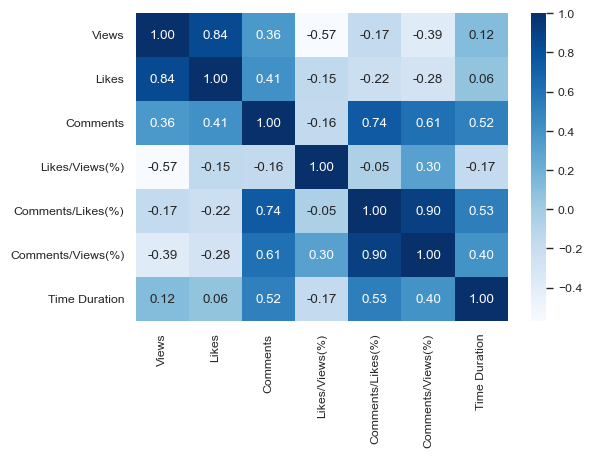

In [13]:
# value_video_data = df_video_data[['Views', 'Likes', 'Comments', 'Likes/Views(%)', 'Comments/Likes(%)', 'Comments/Views(%)', 'Time Duration']]


plt.figure(figsize=(6,4))
sns.set_context('paper', font_scale=1)

to_drop = ['Views', 'Likes', 'Comments']
drop_df = value_video_data
print(len(drop_df))
for i in to_drop:
    drop_df = VarsCorr.drop_outlier(df=drop_df, y=i, per=0.05)
    # print(len(drop_df))

# value_video_data.head();
crash_mx = drop_df.corr()
crash_mx;

sns.heatmap(crash_mx, annot=True, cmap='Blues',fmt=".2f")
# sns.heatmap(crash_mx, annot=True, fmt=".1f")

## remove outlier

In [8]:
import SelfModules.Module_RemoveOutlier as RemoveOutlier
import pandas as pd

In [9]:
df_dealed_data = pd.read_pickle('muggles_dealed_data.pickle')

# simplify group names
list_group = list(df_dealed_data['Group'])
for i in range(0, len(list_group)):
    list_group[i] = list_group[i].strip('麻瓜女孩向前衝')

df_dealed_data['Group'] = list_group
df_dealed_data.head()
## ================================

list_del_var = ['Views', 'Likes', 'Comments']
df_no_outlier = RemoveOutlier.remove_outlier(df_dealed_data, list_del_var, 1.5)

df_no_outlier.head()

# save data
%timeit df_no_outlier.to_pickle('muggle_no_outlier_tight.pickle')
!ls -GFlash muggle_no_outlier_tight.pickle

Inital number of data: 535
Removing 50 outliers...
Finished. Left 485 Data
1.06 ms ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
648 -rw-r--r--  1 yulinzhou  staff   264K Apr 14 11:12 muggle_no_outlier_tight.pickle


In [12]:
df_dealed_data = pd.read_pickle('muggles_dealed_data.pickle')

# simplify group names
list_group = list(df_dealed_data['Group'])
for i in range(0, len(list_group)):
    list_group[i] = list_group[i].strip('麻瓜女孩向前衝')

df_dealed_data['Group'] = list_group
df_dealed_data.head()
## ================================

list_del_var = ['Views', 'Likes', 'Comments']
df_no_outlier = RemoveOutlier.remove_outlier(df_dealed_data, list_del_var, 3)

df_no_outlier.head()

# save data

%timeit df_no_outlier.to_pickle('muggle_no_outlier_loose.pickle')
!ls -GFlash muggle_no_outlier_loose.pickle

Inital number of data: 535
Removing 17 outliers...
Finished. Left 518 Data
1.17 ms ± 40.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
648 -rw-r--r--  1 yulinzhou  staff   284K Apr 14 11:14 muggle_no_outlier_loose.pickle
